In [1]:
# This note is created to analyze the FBI's NICS data. This data is supplemented by https://www.census.gov/
# This data is analyzed to provide insights on whether a person will be alowed to buy the guns/explosives etc.     
# based on the historical data.


# Over the course on this note-book, we will be exploring below questions on above mentioned data set.
# 1. What census data is most associated with high gun per capita?    
# 2. Which states have had the highest growth in gun registrations?
# 3. What is the overall trend of gun purchases?
import numpy as np, matplotlib.pyplot as plt, pandas as pd 
from matplotlib import style
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
style.use("fivethirtyeight")

# Step 1 : Load Data and inspect data files.

In [2]:
census_data = pd.read_csv('u.s.-census-data.csv') #Load census data. Source : https://www.google.com/url?q=https://www.census.gov/&sa=D&ust=1526975834919000
gun_data = pd.read_excel('gun-data.xlsx') # Load the gun_purchase data.  Source : https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx&sa=D&ust=1526975834919000 

A). Inspect the columns present in the two sheets.

In [105]:
census_data.head(1)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


B). Find the no. of row and columns present in the two sheets.

In [101]:
census_data.shape

(50, 86)

In [102]:
gun_data.shape

(12485, 29)

C). Check the data present at the very end of the sheet, we'll find that most of the data present are empty/NAN at the end of the sheets

In [103]:
census_data.tail(2)

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
48,Wisconsin,5778708.0,5687289.0,160.0,5686986.0,580.0,630.0,2230.0,2360.0,1610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Wyoming,585501.0,563767.0,390.0,563626.0,650.0,710.0,2370.0,2400.0,1500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
gun_data.tail(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


D). Inspect the columns present and the dtypes

In [214]:
census_data.columns[:5]

Index(['state', 'state', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'],
      dtype='object', name='Fact')

In [217]:
census_data.columns[-10:]

Index([nan, 'Value Flags', '-', 'D', 'F', 'FN', nan, 'S', 'X', 'Z'], dtype='object', name='Fact')

In [107]:
gun_data.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'year', 'months'],
      dtype='object')

Hence we find that most of the columns in the census data is of very less use to us like '(a)','(b)','(c)', nan, 'Value Flags', '-', 'D', 'F', 'FN', nan, 'S', 'X', 'Z'. we'll remove these in our analysis.    Let's analyze their data types of the columns also.

In [142]:
gun_data.dtypes

month                        object
state                        object
permit                        int64
permit_recheck                int64
handgun                       int64
long_gun                      int64
other                         int64
multiple                      int64
admin                         int64
prepawn_handgun               int64
prepawn_long_gun              int64
prepawn_other                 int64
redemption_handgun            int64
redemption_long_gun           int64
redemption_other              int64
returned_handgun              int64
returned_long_gun             int64
returned_other                int64
rentals_handgun               int64
rentals_long_gun              int64
private_sale_handgun          int64
private_sale_long_gun         int64
private_sale_other            int64
return_to_seller_handgun      int64
return_to_seller_long_gun     int64
return_to_seller_other        int64
totals                        int64
year                        

In [143]:
census_data.dtypes

Fact
state                                                                                     object
Population estimates, July 1, 2016,  (V2016)                                             float32
Population estimates base, April 1, 2010,  (V2016)                                       float32
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    float32
Population, Census, April 1, 2010                                                        float32
Persons under 5 years, percent, July 1, 2016,  (V2016)                                   float32
Persons under 5 years, percent, April 1, 2010                                            float32
Persons under 18 years, percent, July 1, 2016,  (V2016)                                  float32
Persons under 18 years, percent, April 1, 2010                                           float32
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              float32
Persons 65 years and over

Now get the list of states present in U.S.

In [139]:
states_list = list(set(gun_data.state.tolist()))
print(states_list) #Print set of unique states in the gun data 

['North Carolina', 'Georgia', 'Idaho', 'Indiana', 'New Mexico', 'Rhode Island', 'Michigan', 'Arkansas', 'Colorado', 'Minnesota', 'Arizona', 'California', 'North Dakota', 'Virginia', 'Iowa', 'District of Columbia', 'South Dakota', 'Alabama', 'Maryland', 'Missouri', 'Kansas', 'Montana', 'Nevada', 'Mississippi', 'Wisconsin', 'Ohio', 'Massachusetts', 'New Hampshire', 'Guam', 'Maine', 'Delaware', 'Kentucky', 'Nebraska', 'South Carolina', 'Florida', 'Oregon', 'Tennessee', 'Texas', 'Oklahoma', 'New Jersey', 'New York', 'Puerto Rico', 'Illinois', 'Alaska', 'Utah', 'Louisiana', 'Washington', 'West Virginia', 'Mariana Islands', 'Vermont', 'Virgin Islands', 'Hawaii', 'Wyoming', 'Pennsylvania', 'Connecticut']


describe() and info() methods can be used to get the gist of the data

In [141]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6413.628194,1165.084261,5940.879696,7810.846296,360.207769,268.603364,58.896436,4.699159,7.704205,0.067841,...,0.005767,14.206167,11.132799,1.006648,0.079696,0.097317,0.019143,21595.725911,2007.792952,6.484581
std,23729.495816,2736.848187,8611.677589,9302.758891,895.634659,783.185073,604.257420,10.027534,15.133912,0.681467,...,0.173912,33.420847,25.459852,2.096603,0.663611,0.740136,0.186114,32591.418387,5.468296,3.451944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998.000000,1.000000
25%,0.000000,1165.000000,868.000000,2079.000000,163.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,14.000000,11.000000,1.000000,0.000000,0.000000,0.000000,4638.000000,2003.000000,3.000000
50%,522.000000,1165.000000,3067.000000,5130.000000,360.000000,125.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,14.000000,11.000000,1.000000,0.000000,0.000000,0.000000,12399.000000,2008.000000,6.000000
75%,4338.000000,1165.000000,7277.000000,10374.000000,360.000000,301.000000,0.000000,4.000000,7.000000,0.000000,...,0.000000,14.000000,11.000000,1.000000,0.000000,0.000000,0.000000,25453.000000,2013.000000,9.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000,2017.000000,12.000000


In [14]:
grouped_gun_data_by_state = gun_data.groupby('state')

In [15]:
grouped_gun_data_sum = grouped_gun_data_by_state.sum()

In [16]:
gun_state_totals = grouped_gun_data_sum['totals'] 
gun_state_totals.describe()

count    5.500000e+01
mean     4.902230e+06
std      5.606927e+06
min      4.620000e+02
25%      1.180779e+06
50%      3.576312e+06
75%      6.466768e+06
max      2.976243e+07
Name: totals, dtype: float64

#  Step 2 : Data cleaning

Handling missing values

In [17]:
# step 1 : Fill missing values with the mean for that state in gun data
gun_data= gun_data.fillna(gun_data.mean(), axis=0, inplace=True)

In [18]:
# step 2 : Reomve all columns from census_data
census_data =census_data.drop('Fact Note',axis=1)

In [148]:
# step 3 : remove states which are not there in census data
# removing these unmatched states
absent_states = ['District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands']
final_states_list = list(filter(lambda x: x not in absent_states, states_list))
print(final_states_list)

['North Carolina', 'Georgia', 'Idaho', 'Indiana', 'New Mexico', 'Rhode Island', 'Michigan', 'Arkansas', 'Colorado', 'Minnesota', 'Arizona', 'California', 'North Dakota', 'Virginia', 'Iowa', 'South Dakota', 'Alabama', 'Maryland', 'Missouri', 'Kansas', 'Montana', 'Nevada', 'Mississippi', 'Wisconsin', 'Ohio', 'Massachusetts', 'New Hampshire', 'Maine', 'Delaware', 'Kentucky', 'Nebraska', 'South Carolina', 'Florida', 'Oregon', 'Tennessee', 'Texas', 'Oklahoma', 'New Jersey', 'New York', 'Illinois', 'Alaska', 'Utah', 'Louisiana', 'Washington', 'West Virginia', 'Vermont', 'Hawaii', 'Wyoming', 'Pennsylvania', 'Connecticut']


In [20]:
for state in final_states_list:
    census_data[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    # remove all the non digit character
    census_data[state]=pd.to_numeric(census_data[state], downcast='float', errors='ignore')
    #convert data type to float and ignore the nan value

In [147]:
#Step 4: we'll extract Year and months column based on month in Gun data
# and convert data type from string to numeric 
gun_data['year']=gun_data['month'].apply(lambda x: x.split("-")[0]).astype(int)
gun_data['year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [149]:
gun_data['months'] = gun_data['month'].apply(lambda x: x.split("-")[1]).astype(int)
gun_data['months'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [23]:
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9


Hence we've added year and moth columns in the gun_data dataframes.

In [156]:
#Now we don't need the 1st column for month as we have added new columns for the years and the months. So we'll take the data frame from 2nd column onwards
gun_data_columns = list(gun_data)[2:]
print(gun_data_columns)
print(len(gun_data_columns))

['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals', 'year', 'months']
27


In [157]:
#Step 5: We'll cast columns values to integer values as argument of type 'float' is not iterable while plotting the graph
gun_data[gun_data_columns] = gun_data[gun_data_columns].applymap(np.int64) 
gun_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,9


#### Now we'll clean and wrangle census data

In [158]:
census_data.head(1)

,Fact,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming


In [159]:
census_data.set_index('Fact',inplace=True)

We'll interchange rows and columns to align it with gun data DataFrames

In [160]:
# We'll interchange rows and columns to align it with gun data DataFrames
census_data = census_data.T.reset_index()  

In [161]:
census_data.rename(columns={'index':'state'},inplace = True)

In [162]:
census_data.head(1)

Fact,state,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
0,0,Alabama,4.8633e+06,4.78013e+06,170,4.77974e+06,600,640,2260,2370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hence we see that now the census data looks similar to our gun buying data with states represeted as columns in the dataframes.

# 1. What census data is most associated with high gun per capita?    


In [31]:
#Get subset data for 2016 and 2010
gun_data_16=gun_data[gun_data['year'] == 2016]
gun_data_10=gun_data[gun_data['year'] == 2010]
gun_data_16.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
495,2016-12,Alabama,26996,0,13733,17519,376,533,0,10,...,0,2,2,1,0,0,0,62014,2016,12
496,2016-12,Alaska,254,0,4087,3698,243,191,0,3,...,0,0,0,0,0,0,0,8786,2016,12
497,2016-12,Arizona,8900,121,18024,13785,1180,703,0,10,...,0,2,2,0,0,0,0,44887,2016,12
498,2016-12,Arkansas,3294,692,9192,13433,277,385,37,4,...,0,2,7,0,0,0,0,29926,2016,12
499,2016-12,California,61808,0,63649,93224,77929,0,0,0,...,0,0,0,0,0,0,0,298161,2016,12


In [32]:
guntotal_16= gun_data_16.groupby(['state'])['totals'].sum().reset_index()
guntotal_10= gun_data_10.groupby(['state'])['totals'].sum().reset_index()

In [33]:
guntotal_16.rename(columns={'totals':'2016_totals'},inplace = True)
guntotal_10.rename(columns={'totals':'2010_totals'},inplace = True)

In [34]:
guntotal = guntotal_16.merge(guntotal_10, on='state', how='inner')

In [35]:
result = guntotal.merge(census_data, on='state', how='inner')

In [36]:
result['Gun_Per_Capital_2016'] = result['2016_totals']/result['Population estimates, July 1, 2016,  (V2016)']

In [37]:
result['Gun_Per_Capital_2010'] = result['2010_totals']/result['Population estimates base, April 1, 2010,  (V2016)']

Here are the top 5 states in year 2010 for the gun usage per capita.

In [170]:
result.nlargest(5,'Gun_Per_Capital_2010')[['state','Gun_Per_Capital_2010']]

,state,Gun_Per_Capital_2010
16,Kentucky,0.549756
43,Utah,0.200129
25,Montana,0.102177
1,Alaska,0.092797
47,West Virginia,0.086103


Here are the top 5 states in year 2016 for the gun usage per capita.

In [171]:
result.nlargest(5,'Gun_Per_Capital_2016')[['state','Gun_Per_Capital_2016']]

,state,Gun_Per_Capital_2016
16,Kentucky,0.828683
13,Indiana,0.216601
12,Illinois,0.150300
47,West Virginia,0.132352
25,Montana,0.130776


We see that Kentucky has been in the top 5 states for gun usage per capita in 2010 and 2016 both.    Montana and West Virginia have been also coming in the top 5 states.

In [199]:
fact = result.drop(['Gun_Per_Capital_2010','FIPS Code','2016_totals','2010_totals'],axis=1)
#We'll fill NAN values as 0 so that it down't break the plotting.
fact.fillna(0, inplace=True) 
fact.head()

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,-,D,F,FN,nan,S,X,Z,Gun_Per_Capital_2016,gun_purchase_%_growth
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126858,2.000866
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118140,4.031972
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060060,1.980122
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089020,3.567497
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060565,1.523075


TypeError: argument of type 'float' is not iterable

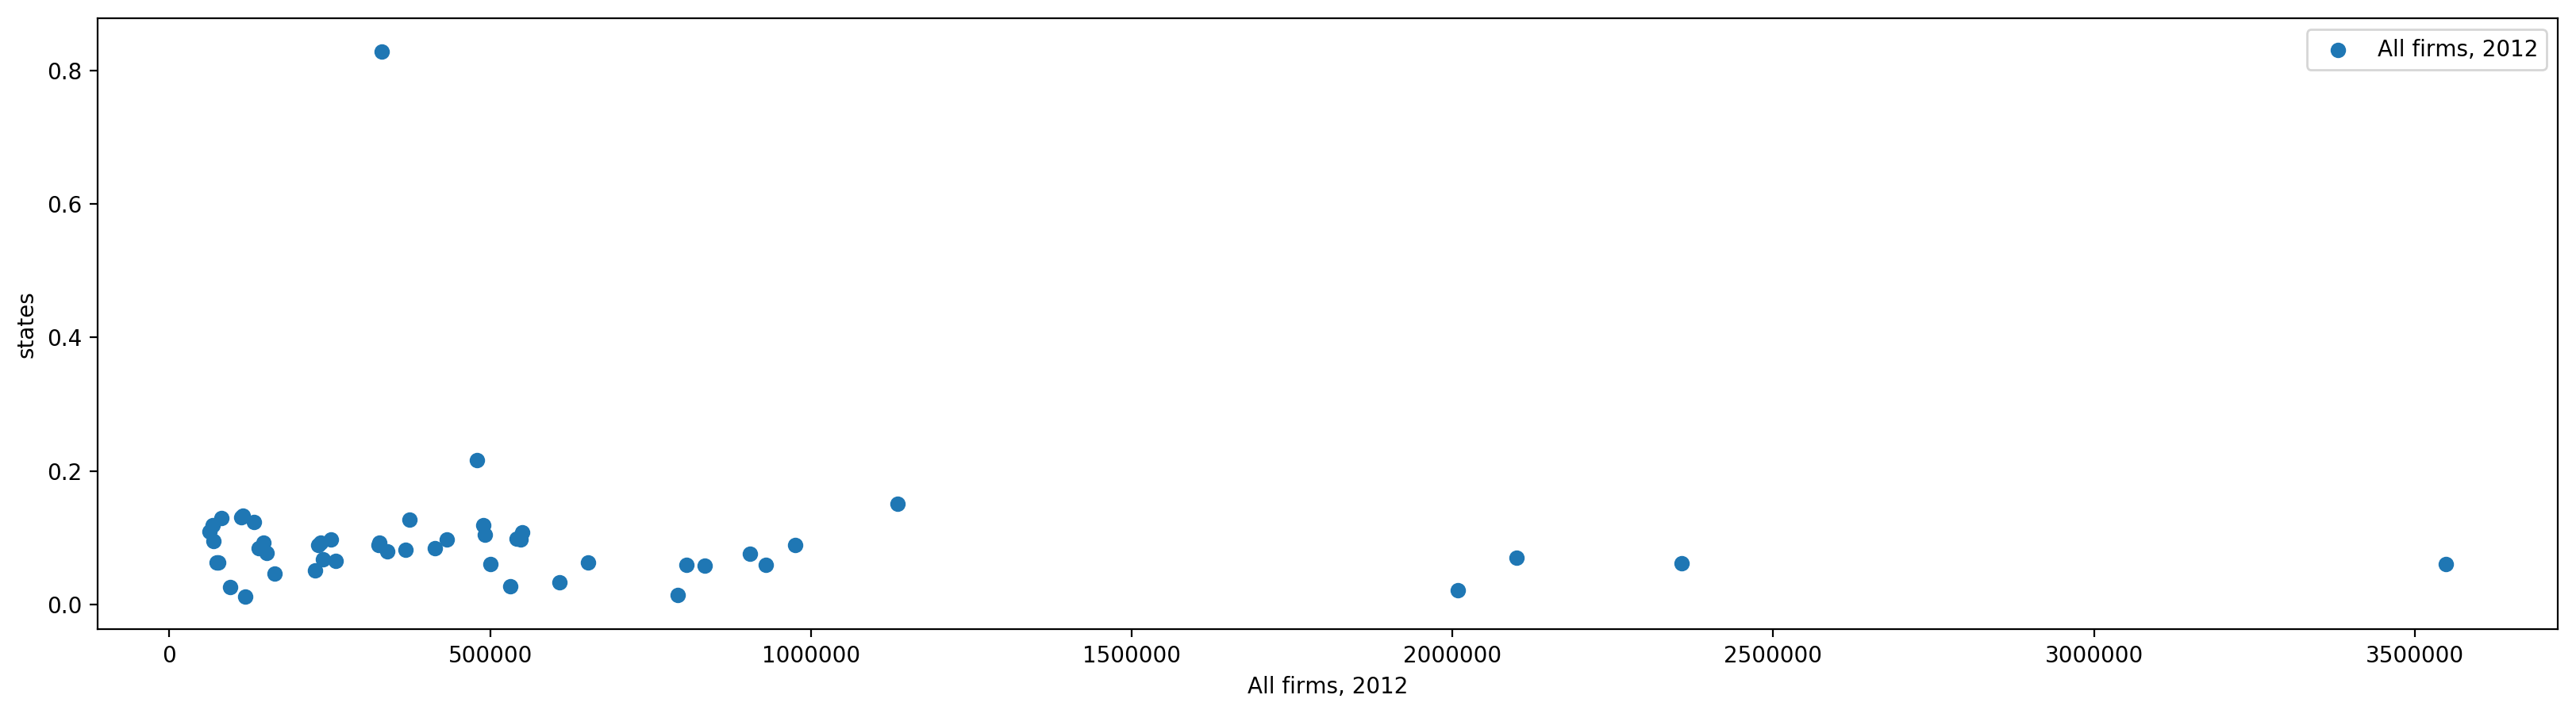

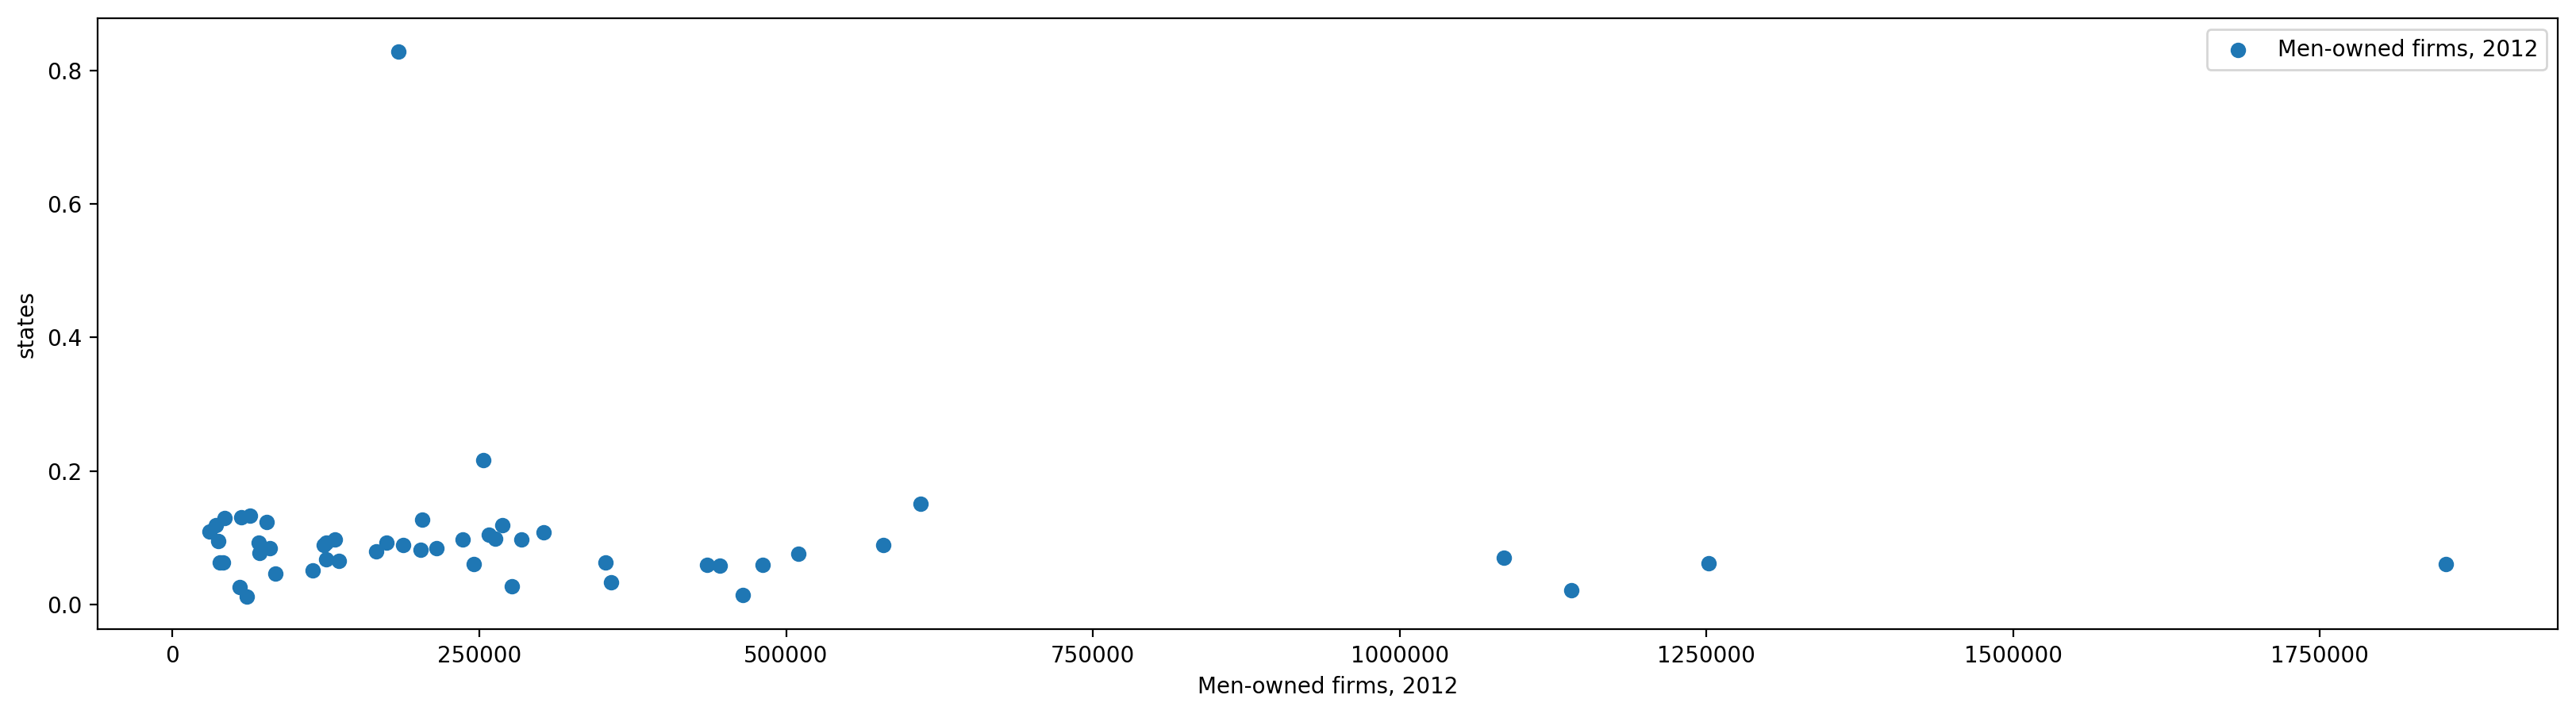

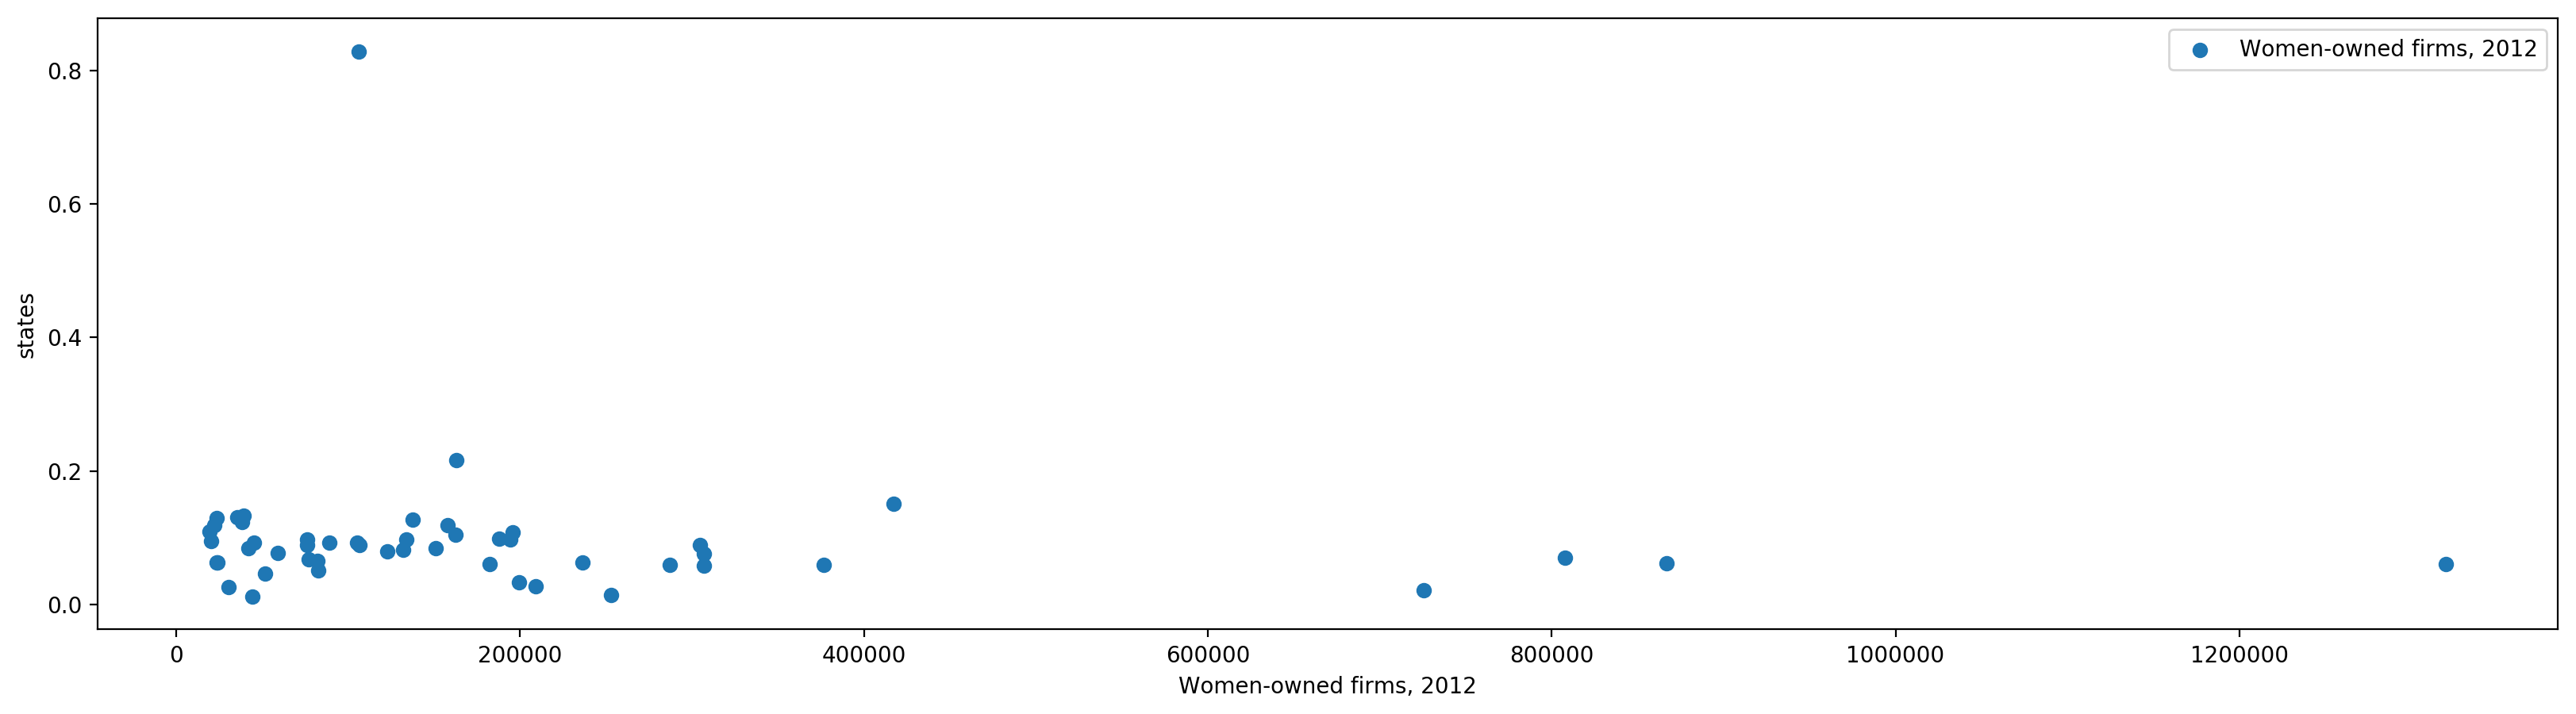

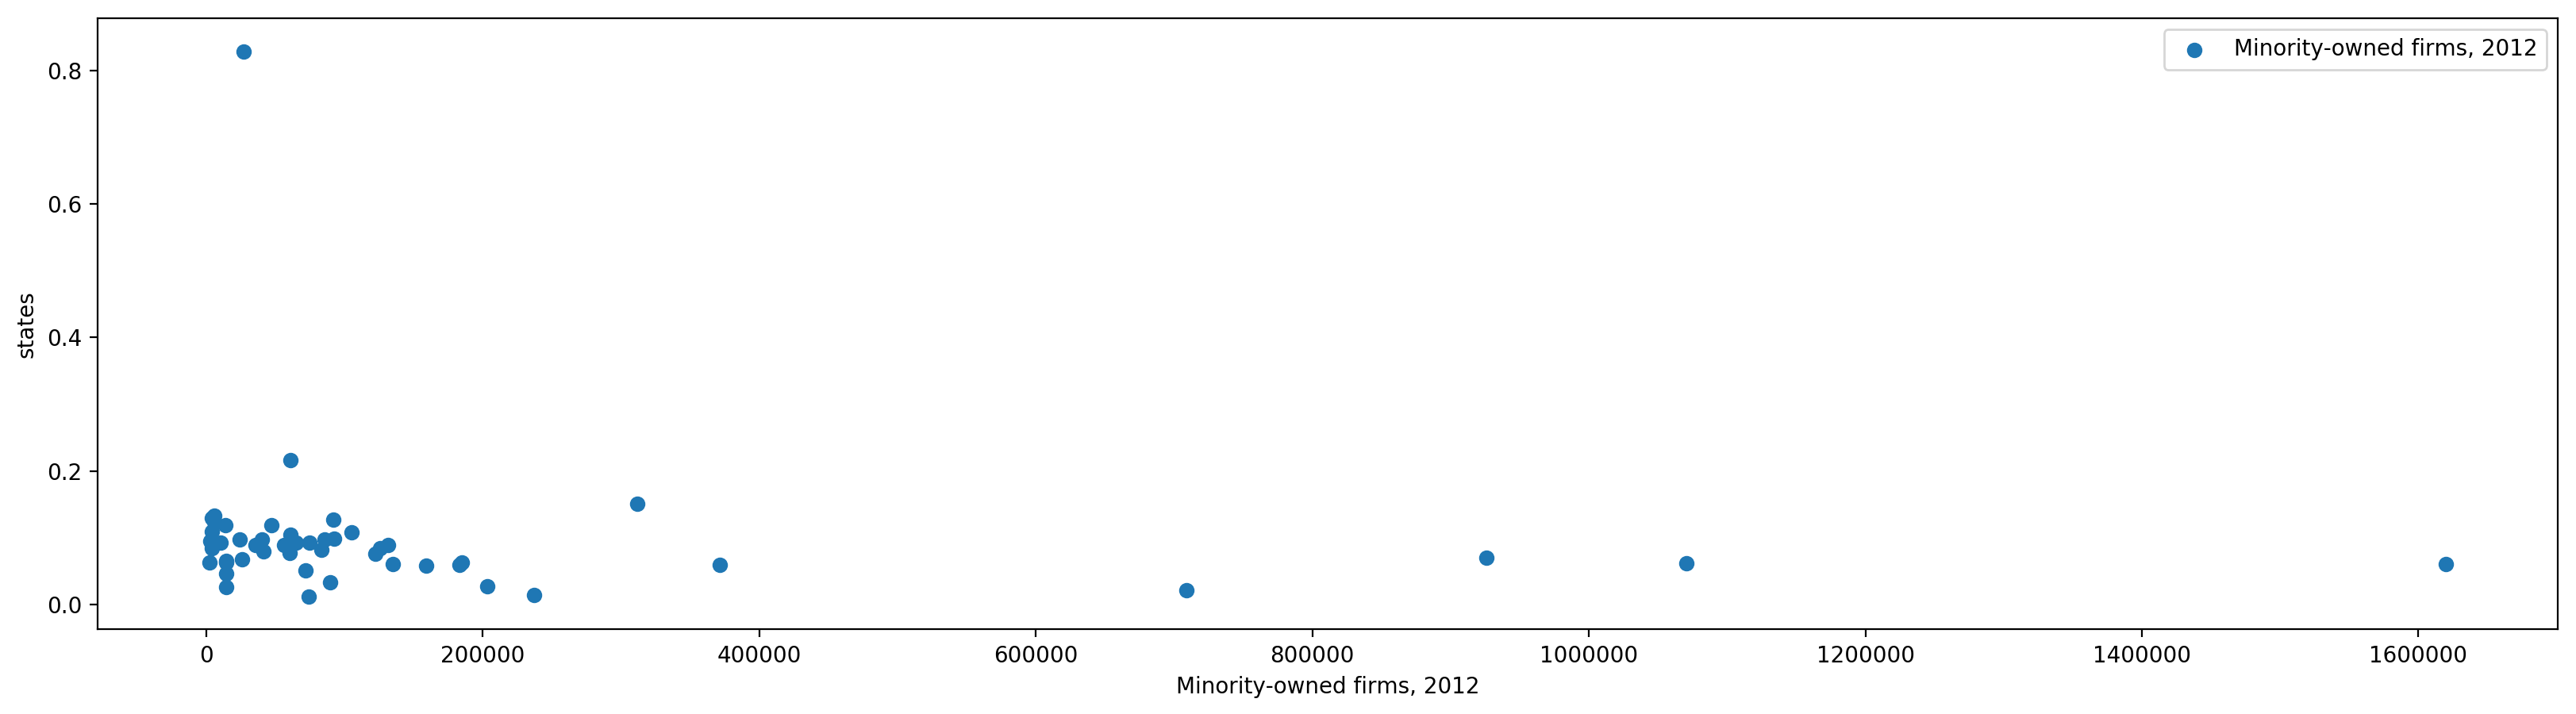

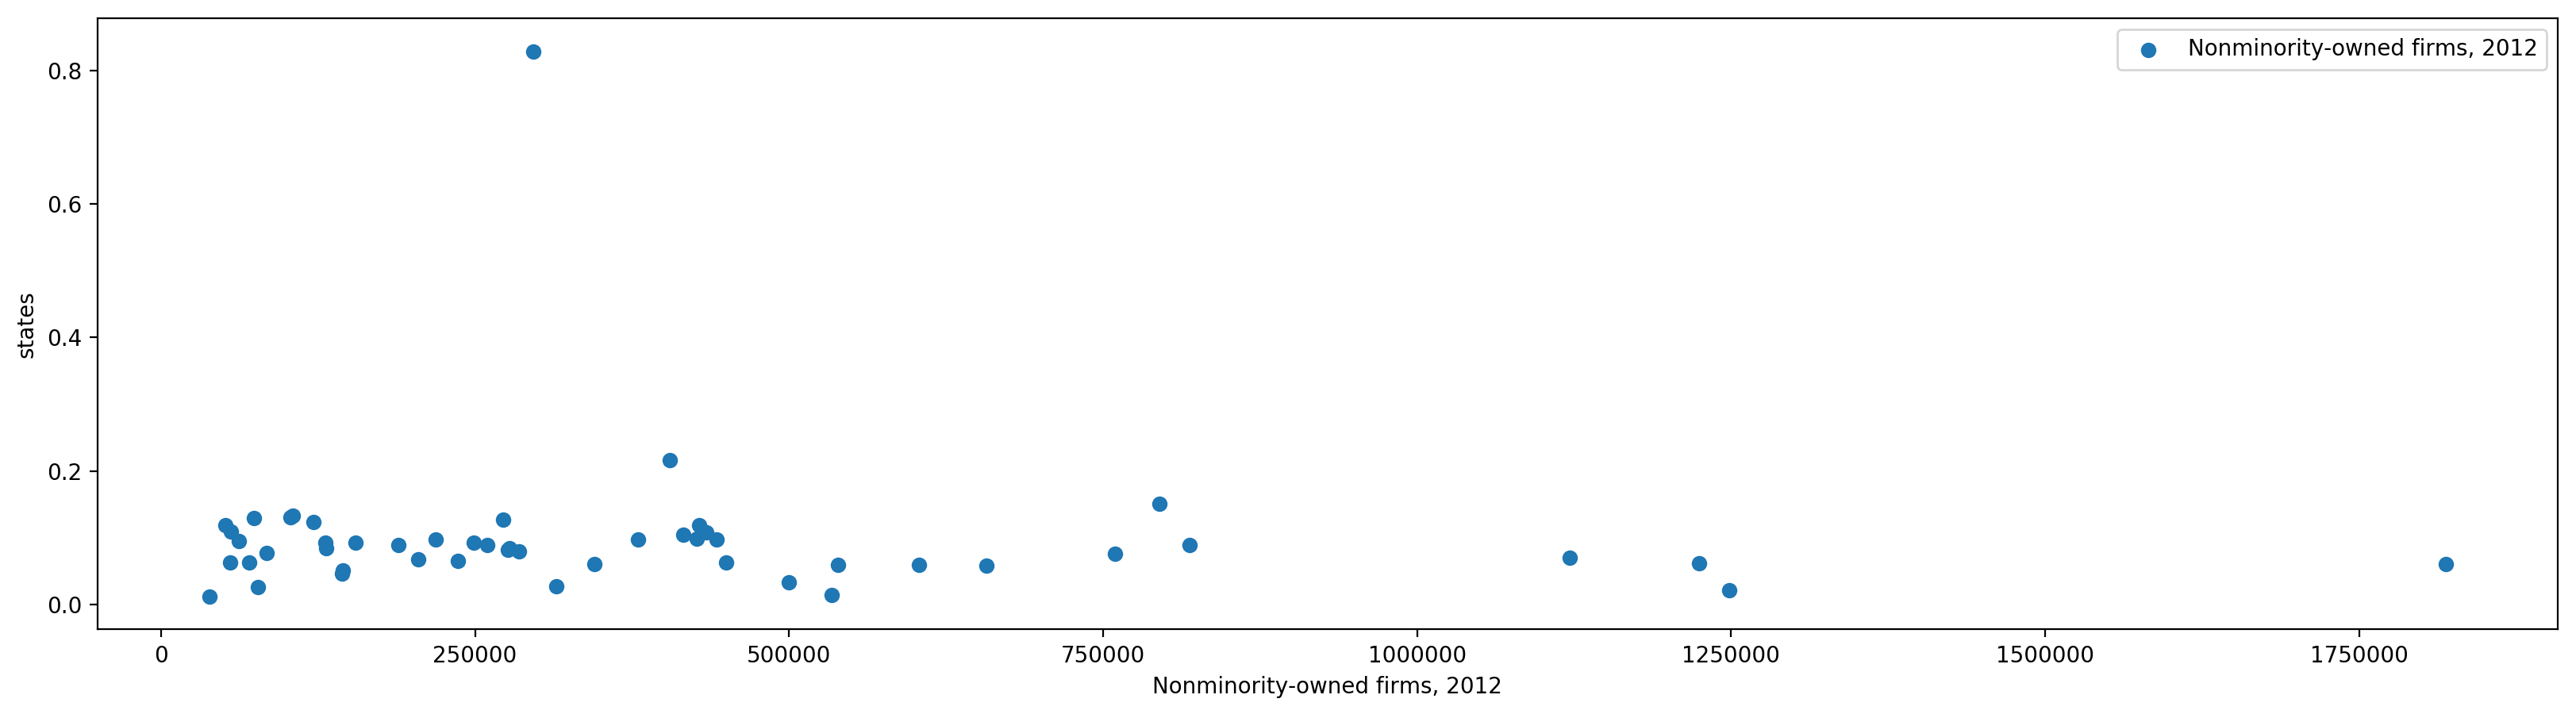

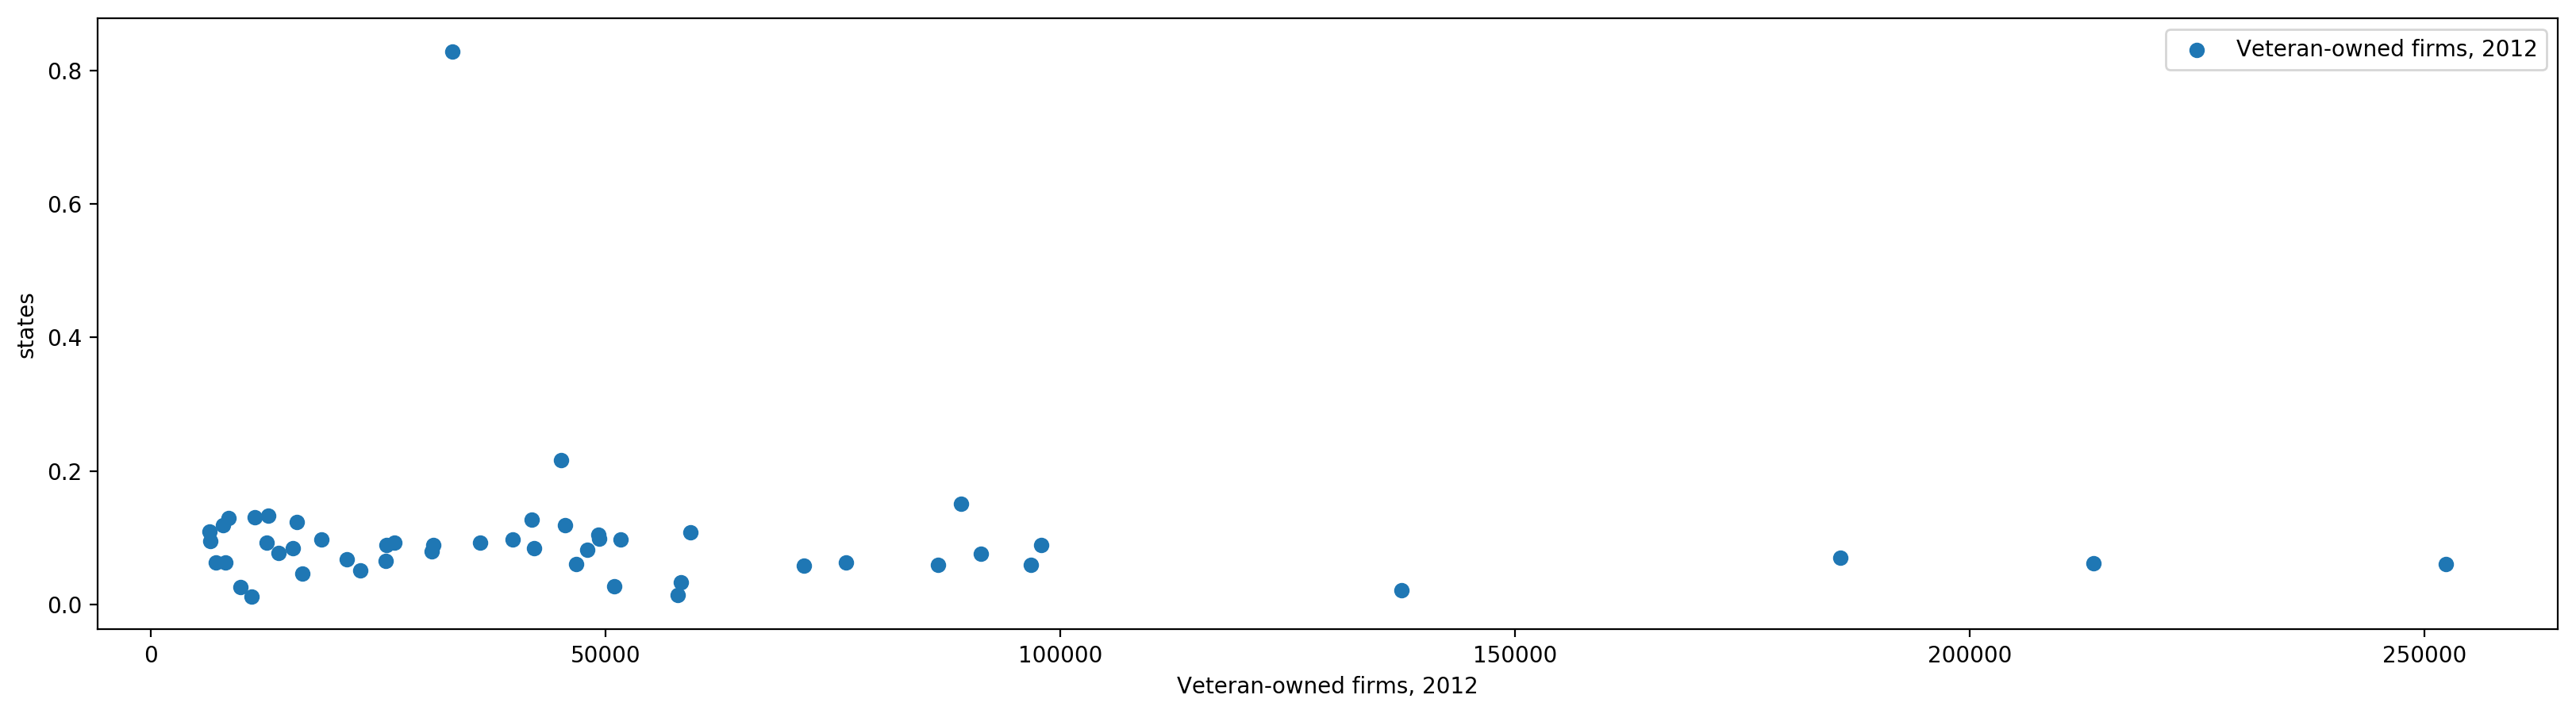

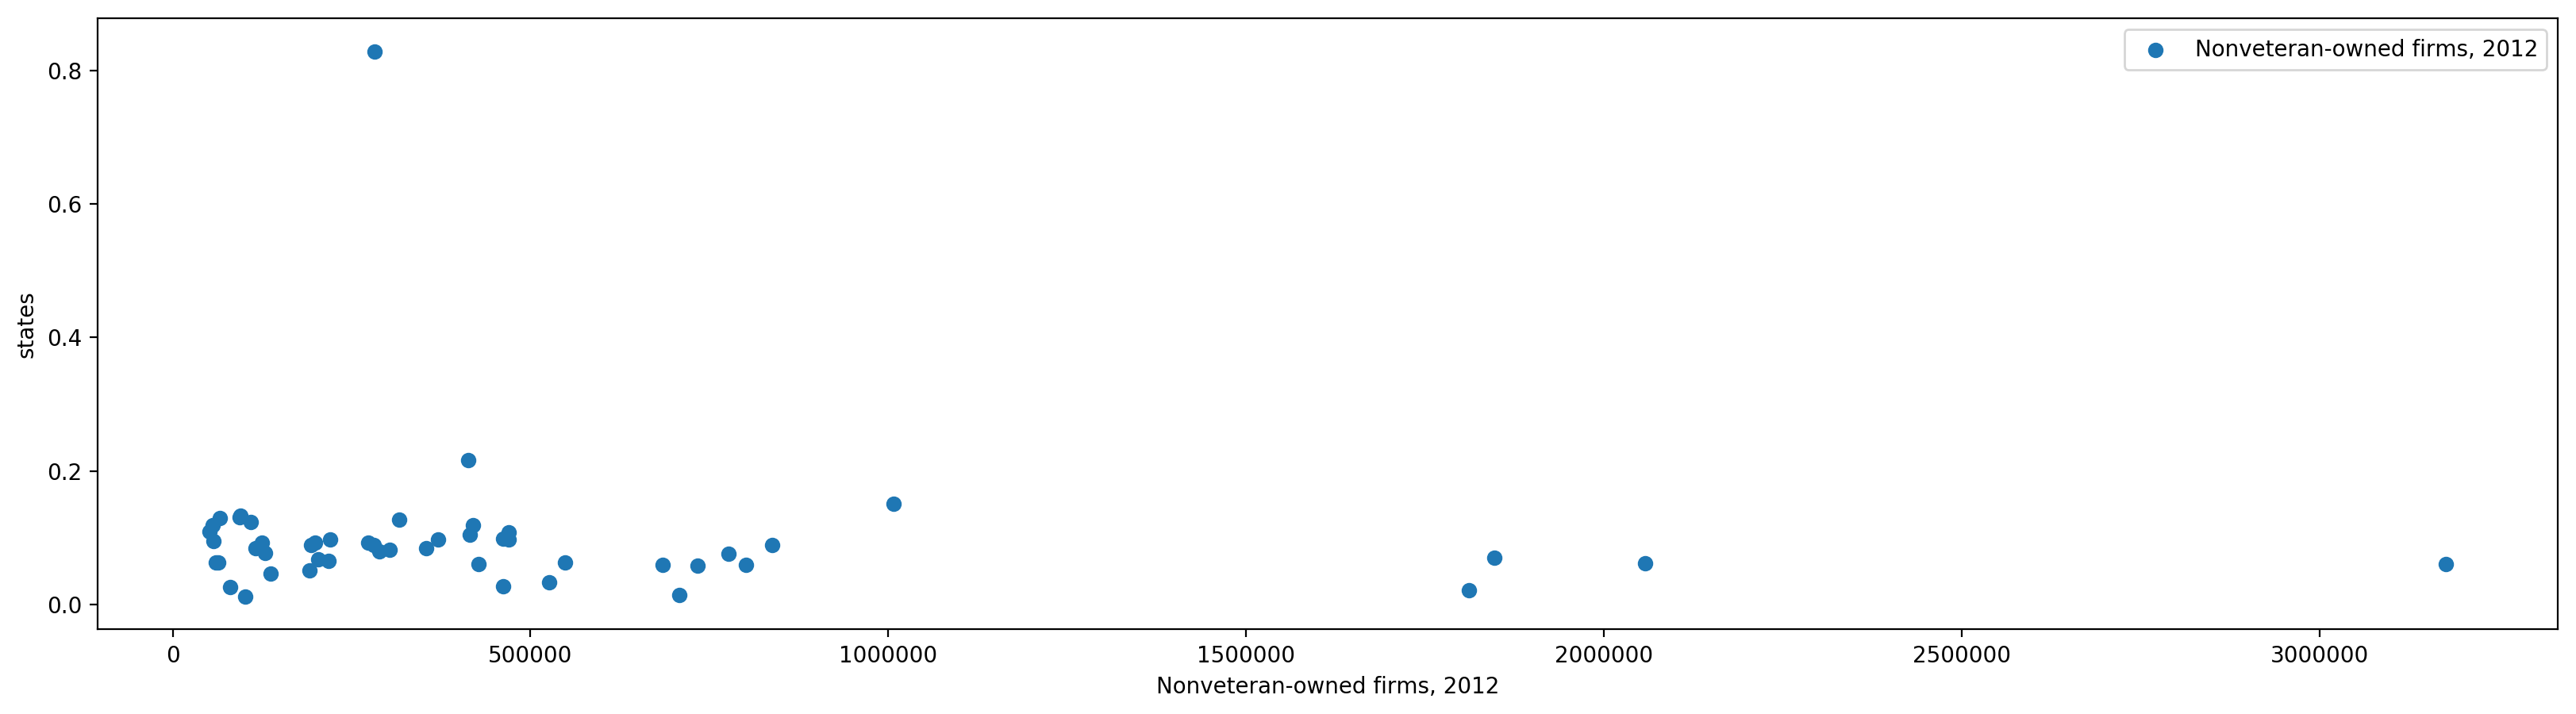

In [206]:
# we create a scatter plot for all the fact variable in speparate figure by Name Group

#figure1: firms related Variable and Gun_Per_Capital 
#Use for loop to create scatter plot for  firms variable in one figure
#TODO : Need help while iterating heterogeneous data type loops as gettign error as : "argument of type 'float' is not iterable"
#Also, how do I plot all in one plot with legend?
for col in list(fact):
    #print(type(col))
    if 'firms' in col:
        plt.figure(figsize=(20,5))
        plt.scatter(fact[col], fact['Gun_Per_Capital_2016'], label =col)
        plt.xlabel(col)
        plt.ylabel('states')
        plt.legend()


TypeError: argument of type 'float' is not iterable

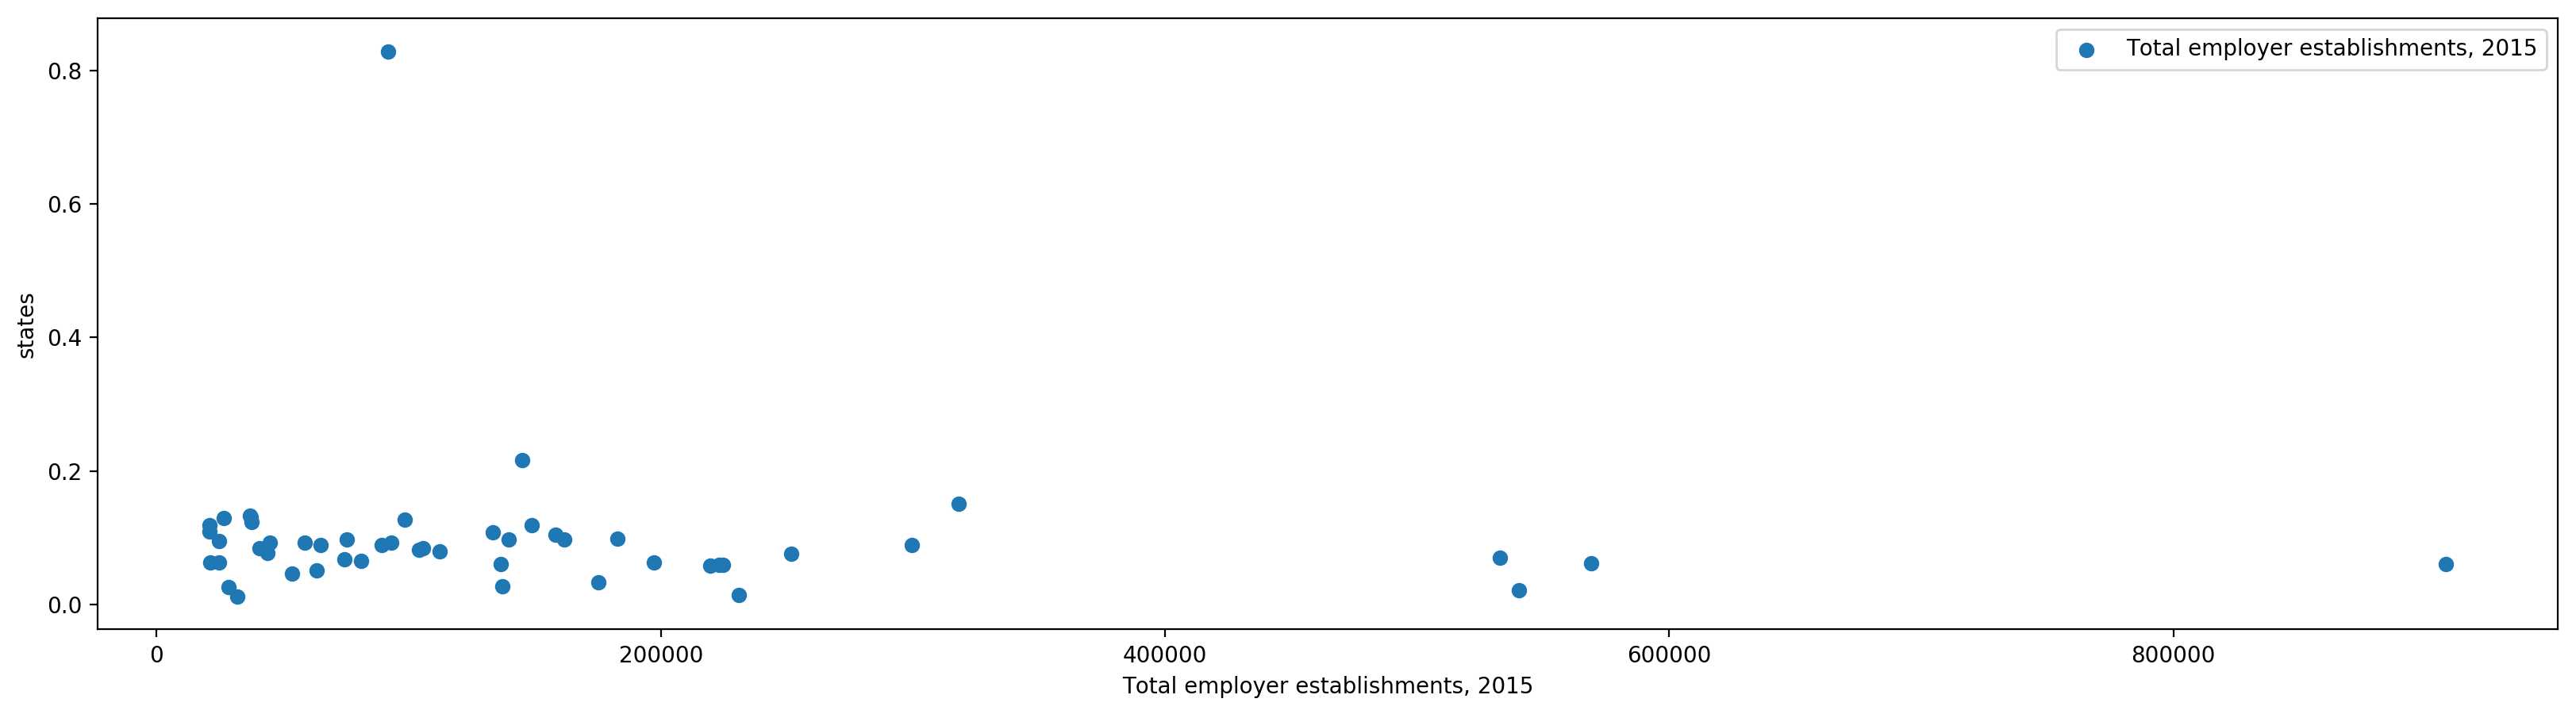

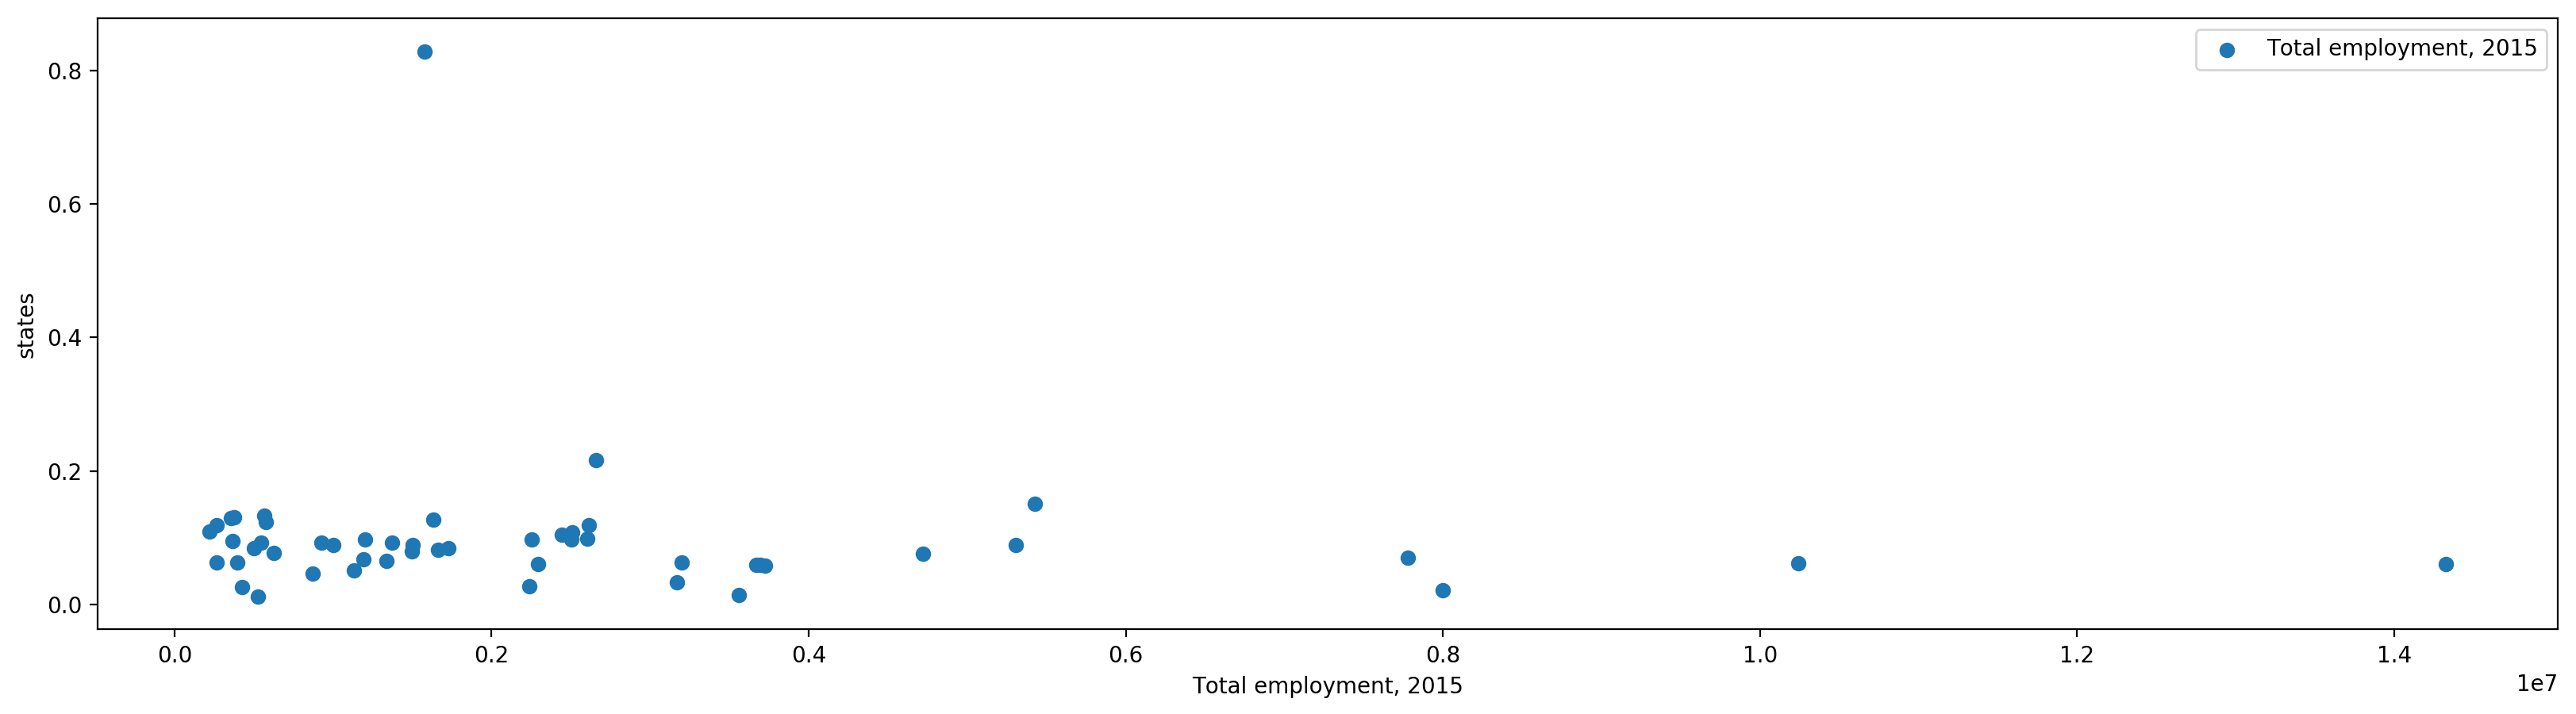

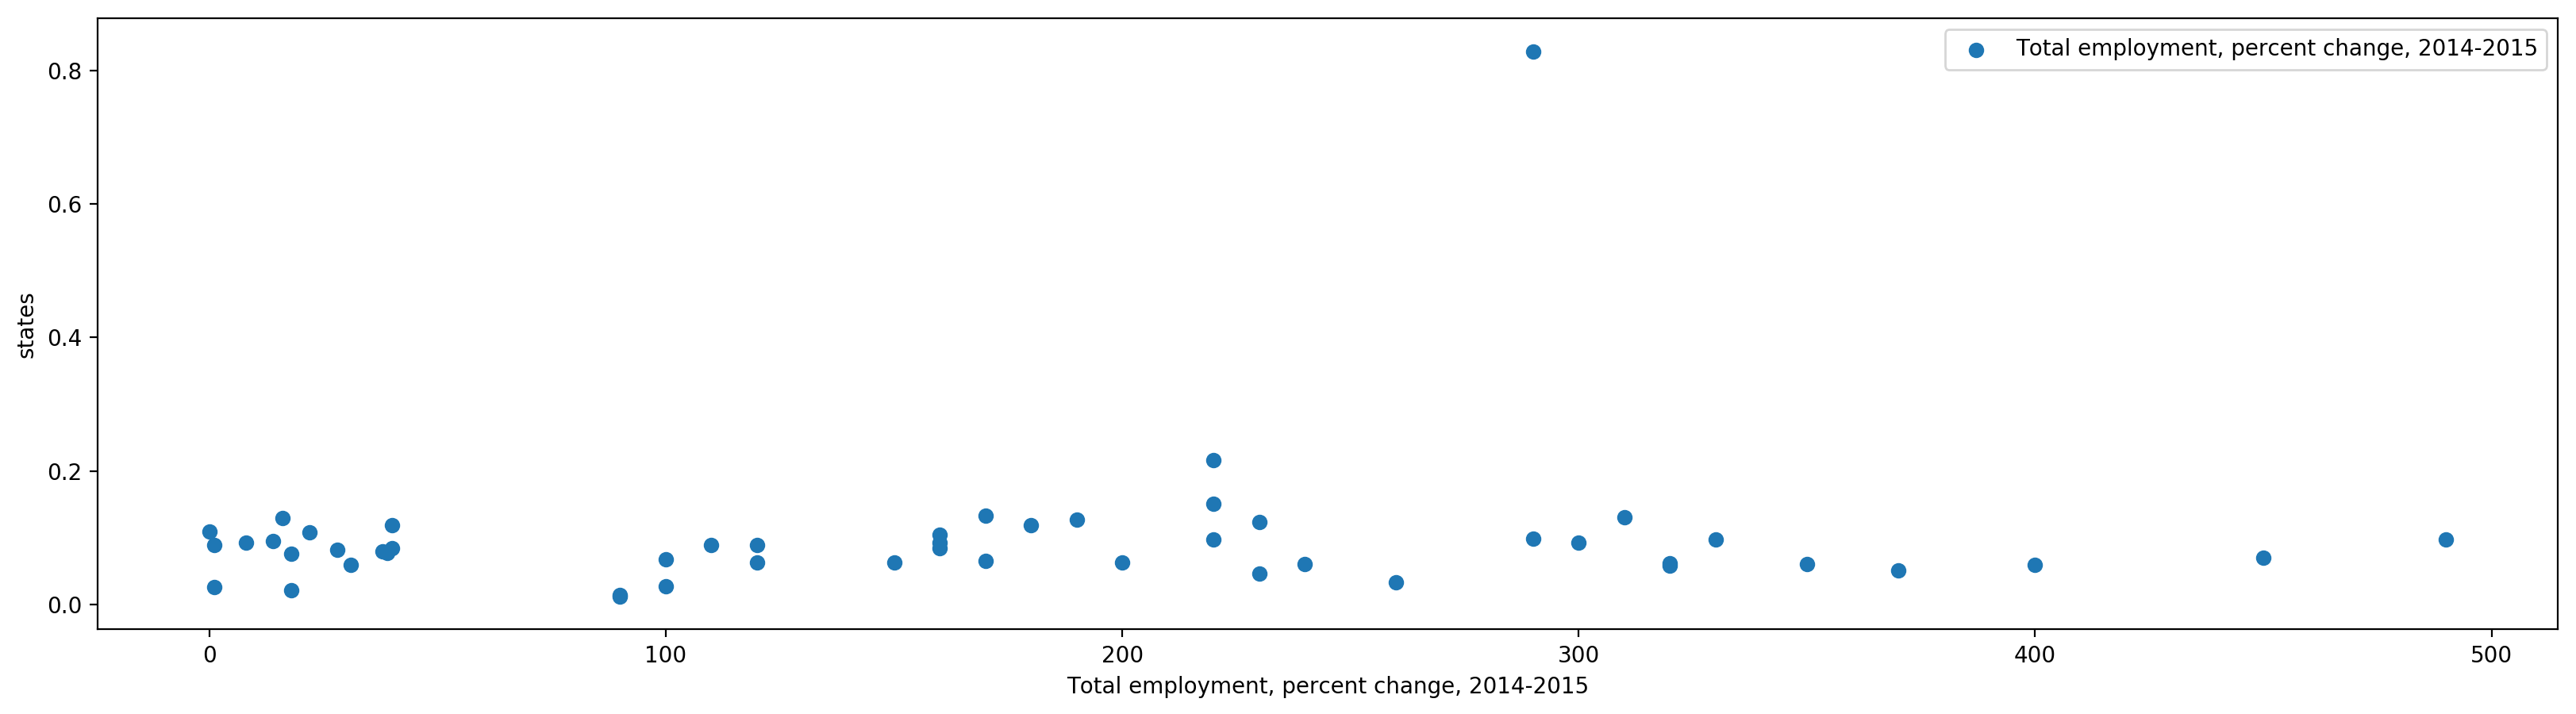

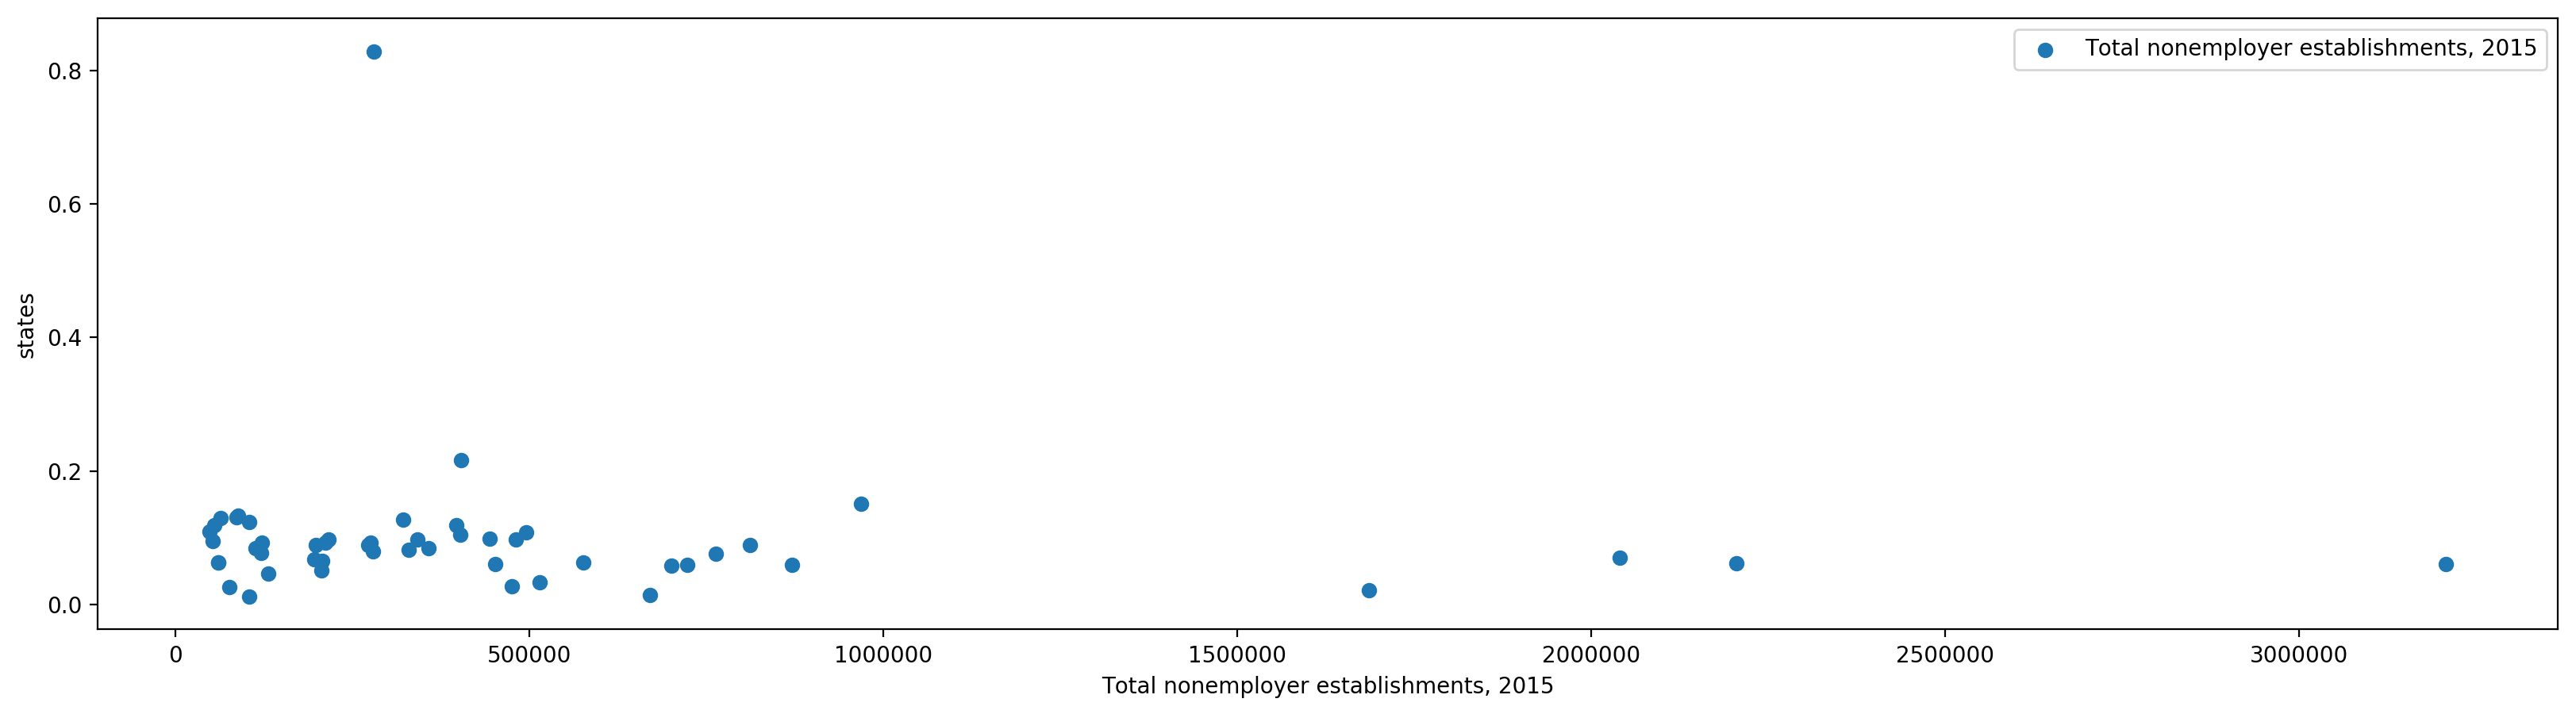

In [205]:
#figure2: Employment related Variable and Gun_Per_Capital 
#TODO : need help while iterating heterogeneous data type loops as gettign error as : "argument of type 'float' is not iterable"
#Also, how do I plot all in one plot with legend?
for col in list(fact):
    if 'employ' in col:
        plt.figure(figsize=(20,5))
        plt.scatter(fact[col],fact['Gun_Per_Capital_2016'], label =col)
        plt.xlabel(col)
        plt.ylabel('states')
        plt.legend()
plt.ylabel("Gun_Per_Capital_2016")

# 2. Which states have had the highest growth and the lowest growth in gun registrations?

Alaska had the highest growth in gun registrations in Jul 2017, increasing by 403.20% compare to Apr 2010.
Additionally Alaska, Wyoming, Montana, Kansasand Arkansas are the top 5 state with highest growth in gun registrations in Jul 2017.    

On the other hand, there are 8 states' gun growth more than 300%, which can be considered outliers.

In [178]:
# We calculate the increasing percentage of gun registrations from 2010 to 2016
result['gun_purchase_%_growth'] = result['2016_totals']/(result['2016_totals']-result['2010_totals'])

In [179]:
# Get the biggest growth percentage 
# the result of the biggest growth perentage is 403.20%
result['gun_purchase_%_growth'].max()

4.031971662526451

In [180]:
# Listing Top 5 rows by gun growth rate descending
result.nlargest(5,'gun_purchase_%_growth')[['state','gun_purchase_%_growth']]

,state,gun_purchase_%_growth
1,Alaska,4.031972
49,Wyoming,4.003399
25,Montana,3.868594
15,Kansas,3.751489
3,Arkansas,3.567497


Alaskas and Wyoming are only two state whose growth more than 400%.

In [181]:
result.nsmallest(5,'gun_purchase_%_growth')[['state','gun_purchase_%_growth']]

,state,gun_purchase_%_growth
43,Utah,-1.142046
13,Indiana,1.316798
7,Delaware,1.478726
4,California,1.523075
48,Wisconsin,1.530750


Also from the gun growth bar chart for all the states, we can see Utah is the only state whose gun growth is descreasing by more than 100%. 

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


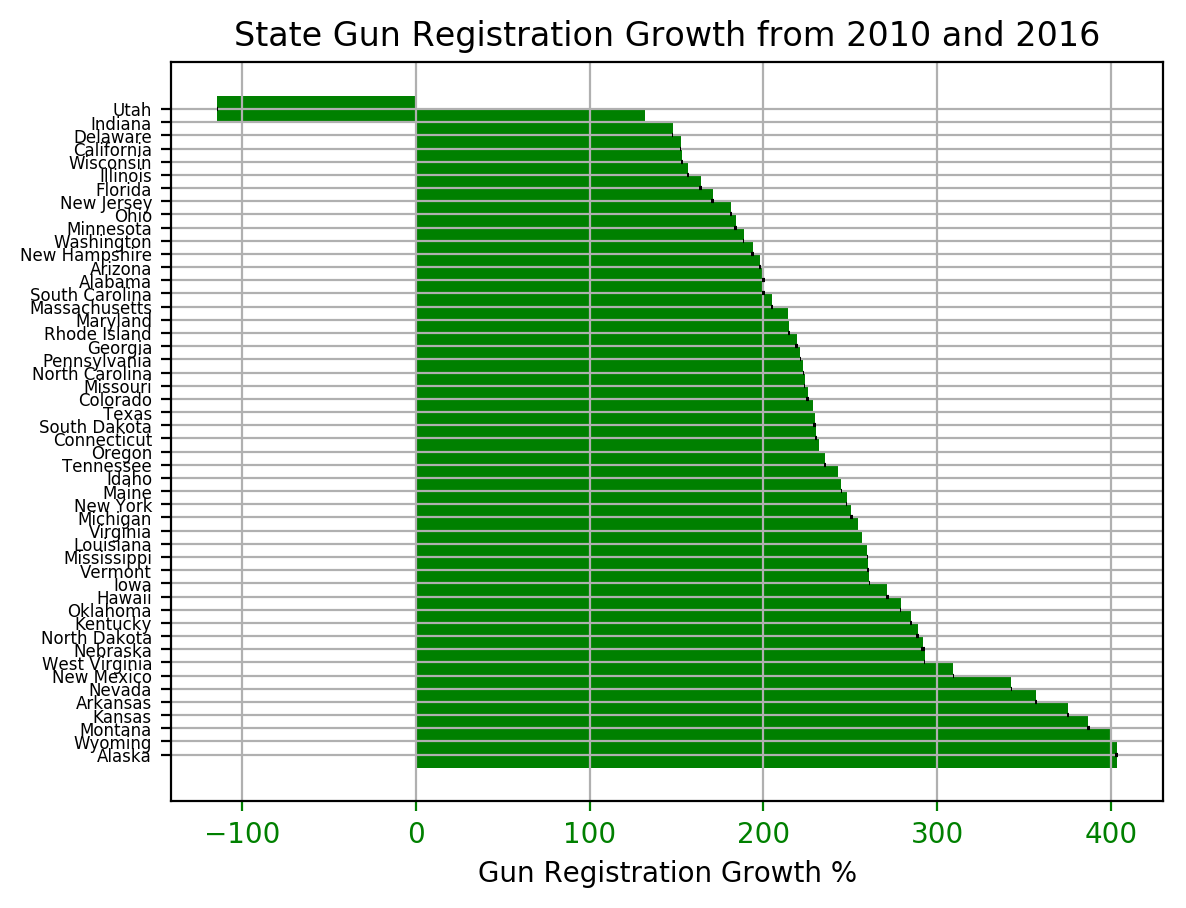

In [182]:
#Create Bar chart for every states'gun growth 
#Set the figure size 
plt.figure(figsize=(150,150))

plt.rcdefaults()
fig, ax = plt.subplots()

#Sort result data by gun_growth value
sorted = result.sort_values(by=['gun_purchase_%_growth'])

#create bar chart 
y_pos = np.arange(len(sorted['state']))
error = np.random.rand(len(sorted['state']))
ax.barh(y_pos, (sorted['gun_purchase_%_growth']*100), xerr=error, align='center',height=2,linewidth=5,color='green', ecolor='black')

#set x and y axis lable and make the label readable
ax.set_yticks(y_pos)
ax.set_xlabel("Gun Registration Growth %")
ax.set_yticklabels(sorted['state'],size=6)

#Invert x and y axis
ax.invert_yaxis()  # labels read top-to-bottom

#Set tick colors:
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='black')

#Set the title
plt.title("State Gun Registration Growth from 2010 and 2016")     
plt.grid(True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


Alaska had the highest growth in gun registrations in Jul 2017, increasing by 403.20% compare to Apr 2010.
Additionally Alaska, Wyoming, Montana, Kansasand Arkansas are the top 5 state with highest growth in gun registrations in Jul 2017.    

On the other hand, there are 8 states' gun growth more than 300%, which can be considered outliers.

# 3. What is the overall trend of gun purchases?

From the line trend for gun purchases by years, we can tell that 
from 1998 to 2016, the  overall of gun purchases is increasing. 
From 1999 to 2005, the number of gun purchases remains stable, and from 2005 to 2016, the number of gun purchases increase from about 10 million to 27 million. From 2016 to 2017, the  number of gun purchases goes down, which is partially due to only 9 months in 2017 being calculated. 

From the line trend for gun purchases by months, we can see the trend of gun purchases varies month to month repeatedly within year, despite the overall upwarding trend. December and January is around the gun perchase peak every year.


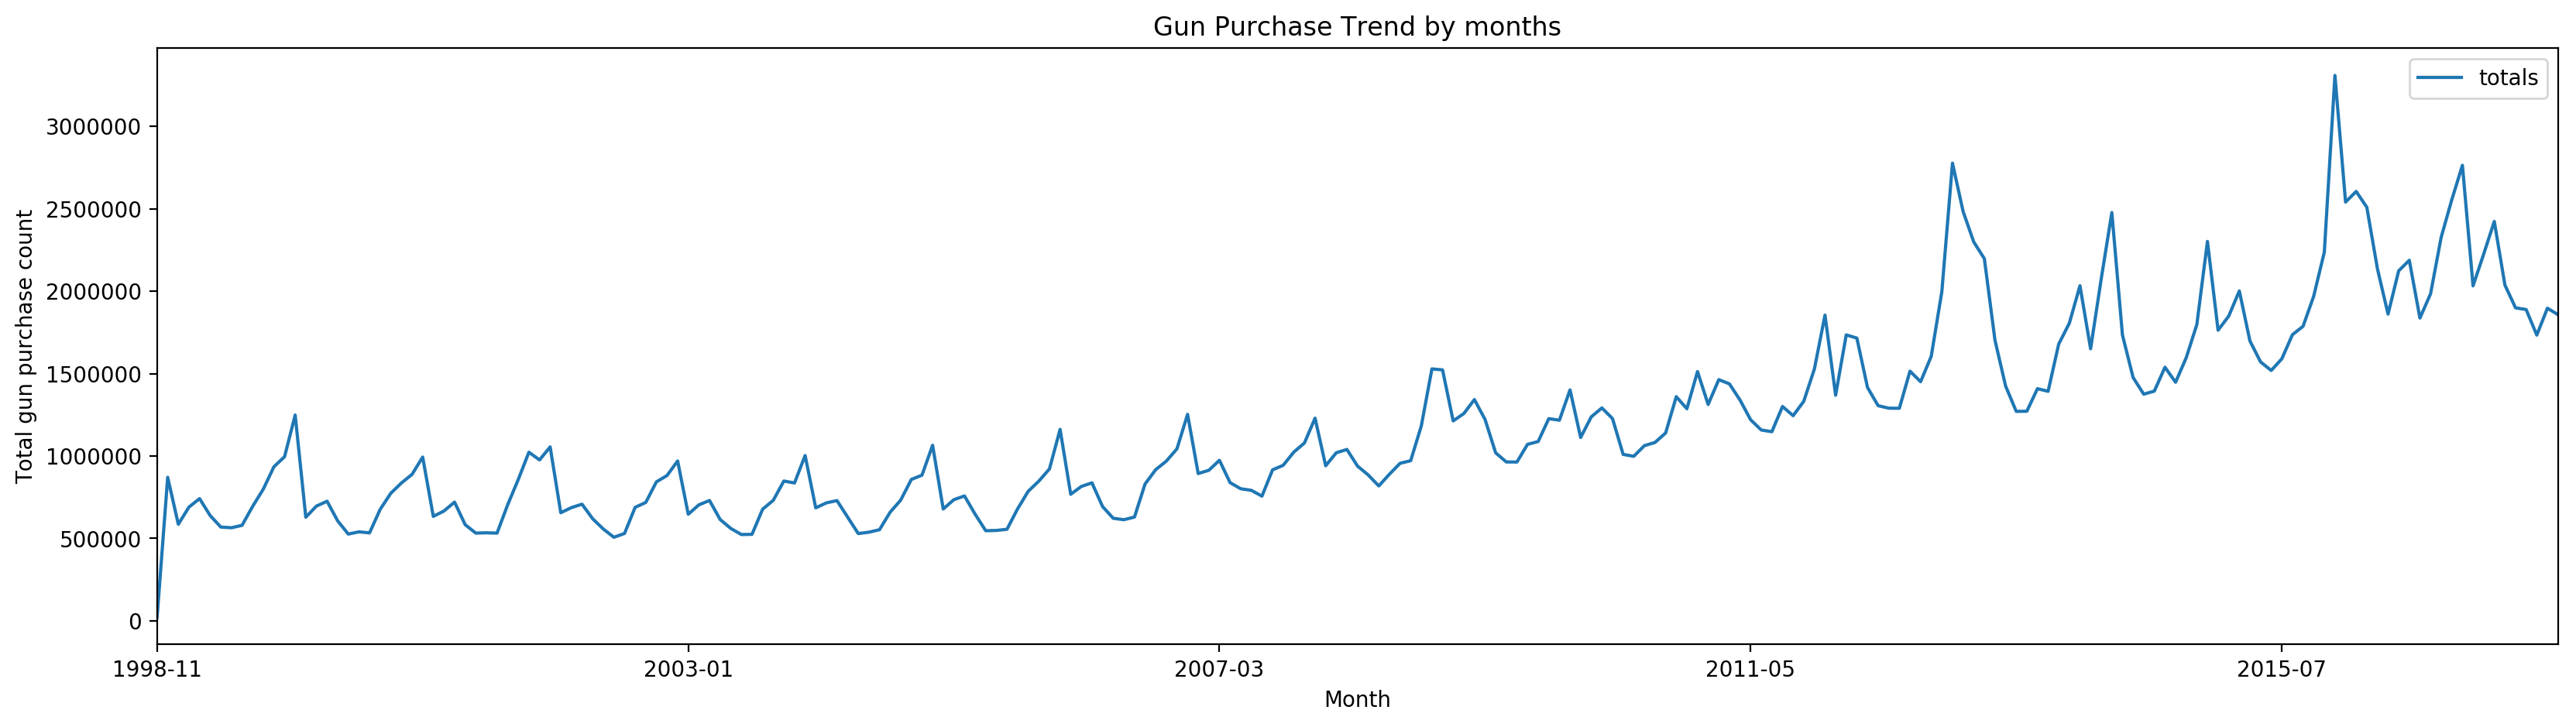

In [220]:
# we create line plot for gun purchase from 2010 to 2016 to observe the overall trend during season

#1. Create line chart using grouped data by year- months, which can be used to observe the change patten 
#during the season

#Assign figure size
plt.figure(figsize=(20,5))

gun_data.groupby('month')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (20, 1))
#set x and y axis lable name
plt.xlabel('Month')
plt.ylabel('Total gun purchase count')
plt.legend()
plt.title("Gun Purchase Trend by months")
plt.show()

year
1998      891898
1999     9043747
2000     8427096
2001     8820045
2002     8367069
2003     8402244
2004     8579891
2005     8867055
2006     9993057
2007    11162272
2008    12692985
2009    13984953
2010    14320489
2011    16336732
2012    19463832
2013    20966704
2014    20860241
2015    23026288
2016    27425512
2017    17990528
Name: totals, dtype: int64


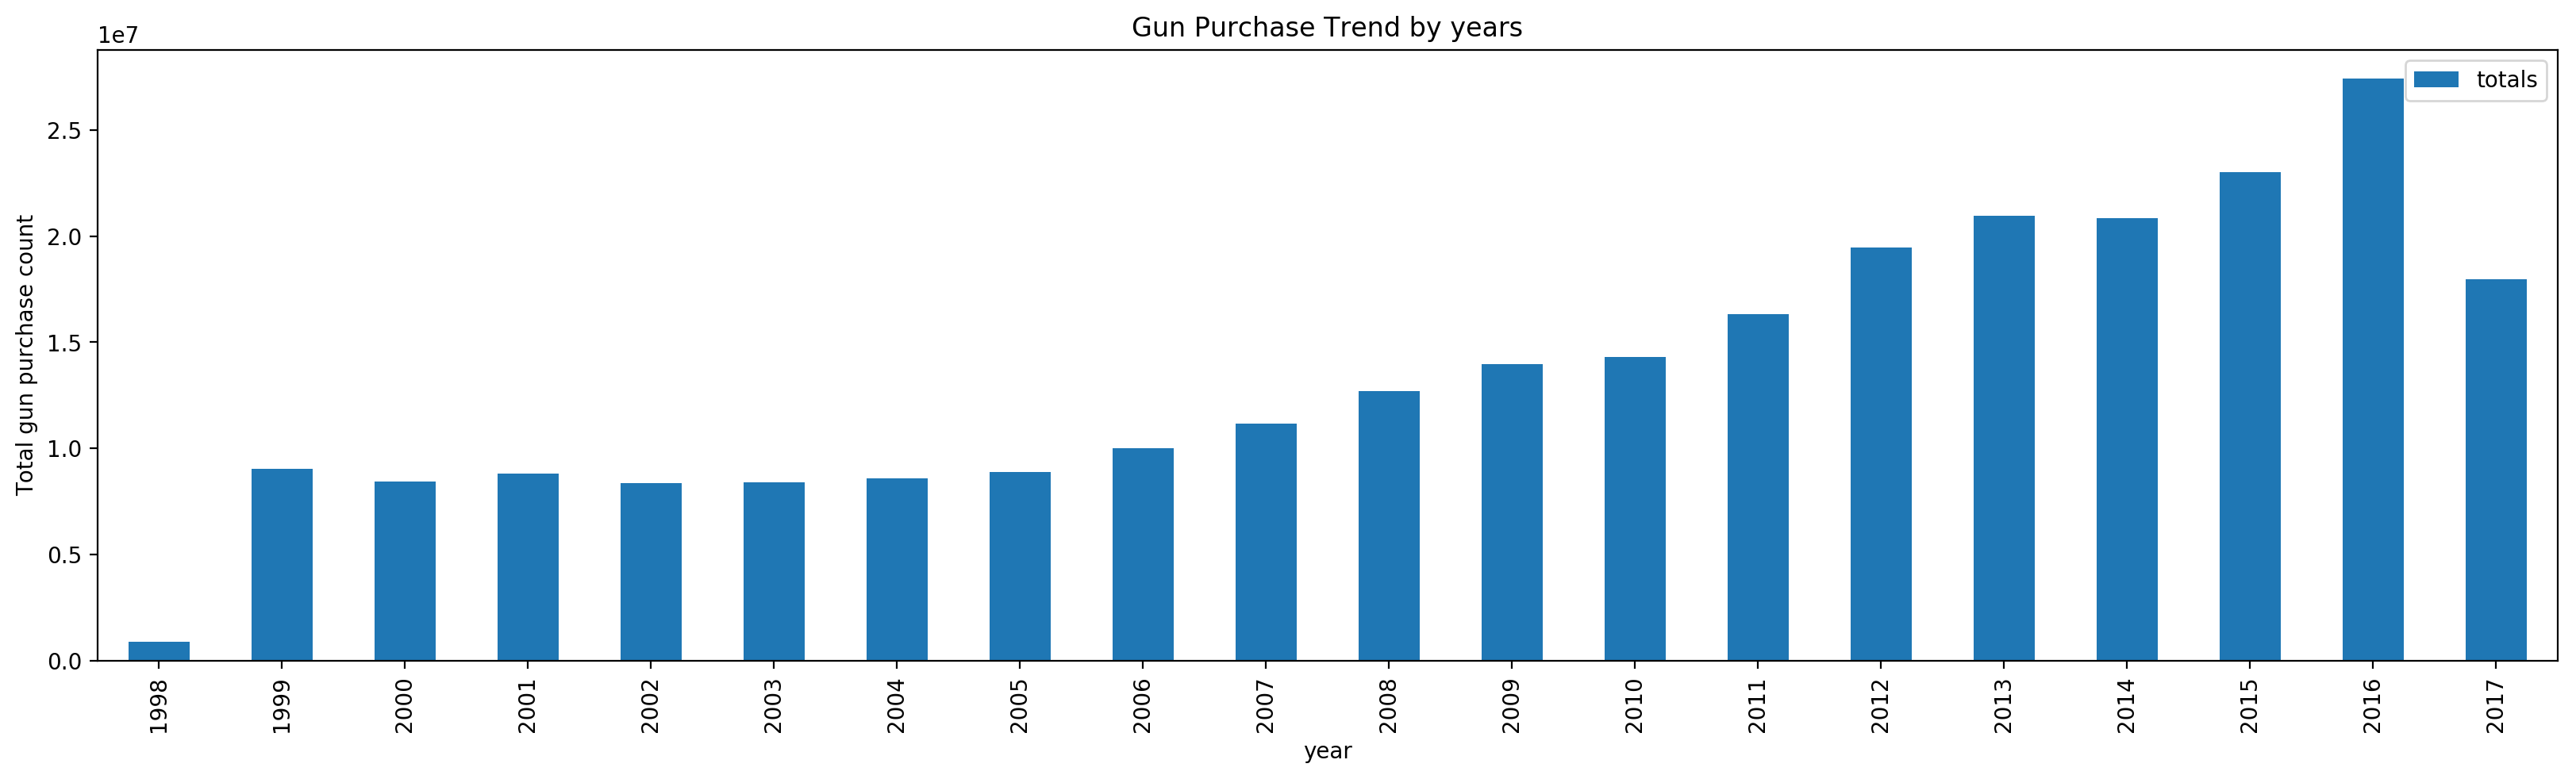

In [218]:
#2. Create line chart using grouped data by year, which can be used to observe the change during the year
plt.figure(figsize=(20,5))
print(gun_data.groupby('year')['totals'].sum())
gun_data.groupby('year')['totals'].sum().plot(kind='bar')

plt.ylabel('Total gun purchase count')
plt.xlabel('year')
plt.title("Gun Purchase Trend by years")
plt.legend()
plt.show()

# Conclusions

1. We evaluate the correlation b/w state, employer and firms variables with the gun buying data. State variable is definately linked with the gun usage per capita which is relevant from the plot. States Kentickey, Montana and West Virginia have been coming in the top 5 states for gun usage per capita.  
2. We see that in some states, gun buying trend is increaing over 400%(Alaska,wyoming, Montana) while some state has donward trend towards buying of gun(Utah). We see an increasing treand in the gun buying over the years.
3. We also see a seasonal treand in the gun buying pattern. It's sale is high in december and january month of each year from the year 1998 onwards till 2016-17. 

Limitations : 

1. Data for year 1998 is only available for two moths. Similarly data for year 2017 is available for 9 moths only. This makes our analysis for 1998 and 2017 wrong. We can see that in "Total gun purchase count", count for 2017 is lower than 2016, which is probably wrong due to imcomplete data.
2. Lot of data is missing as NAN, we replace it with the mean and some time zero while plotting the graph. More accurate method would be plot them and try to fit them as a normal distribution(might go skewed) and hence finding the missing values using the z-score formulae/filling missing values.
3. We've completely dropped the columns containing the mostly NAN values which would ultimately result in the loss of data.